# Attention !!! Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.

Turn in Problem 1, 5, 7.

Extra credit (0.5 pionts) 4.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    # Axes
    'axes.titlesize': 16,
    'axes.titlepad': 20,
    'axes.labelsize': 12,
    'axes.edgecolor': (0.1, 0.1, 0.1),
    'axes.labelcolor': (0.1, 0.1, 0.1),
    'axes.linewidth': 1,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.grid': True,

    # Grid
    'grid.alpha': 0.7,
    'grid.linestyle': '--',
    'grid.linewidth': 0.6,

    # Lines
    'lines.linewidth': 1.5,
    'lines.markeredgewidth': 0.0,

    # Scatter plot
    'scatter.marker': 'x',

    # Ticks
    'xtick.labelsize': 12,
    'xtick.color': (0.1, 0.1, 0.1),
    'xtick.direction': 'in',
    'ytick.labelsize': 12,
    'ytick.color': (0.1, 0.1, 0.1),
    'ytick.direction': 'in',

    # Figure output
    'figure.figsize': (10, 6),
    'figure.dpi': 200,
    'savefig.dpi': 200,

    # Text
    'text.color': (0.2, 0.2, 0.2),

    # Font
    "font.family": ["serif",
                    "Tahoma"] # TH Font
})

# Problem 1: Moontaro prequel

You might wonder how Hamtaro came up with the mean for the growth rate of each coin in the previous homework. He estimated them using MLE!

To simplify the problem, consider a slightly different model for stock pricing. The price at the end of each day is the price of the previous day multiplied by a fixed, but unknown, rate of return, $\alpha$, with some noise, $w$. For a two-day period, we can observe the following Markov process: $P(y_2, y_1, y_0 | \alpha) = P(y_2|y_1)P(y_1|y_0)P(y_0 |\alpha)$ where $ y_2 \sim \mathcal{N}(\alpha y_1, \sigma^2), y_1 \sim \mathcal{N}(\alpha y_0, \sigma^2), y_0 \sim \mathcal{N}(0,\lambda)$

Find the MLE of the rate of return, $\alpha$, given the observed price at the end of each day $y_2,y_1,y_0$.  In other words, compute for the value of $\alpha$ that maximizes $P(y_2,y_1,y_0|\alpha)$.

**Solution**:

from the question Markov process(Chain rule & Markov property), we have:
$$
P(y_2, y_1, y_0 | \alpha) = P(y_2 | y_1) P(y_1 | y_0) P(y_0 | \alpha)
$$
$$
; \quad
y_2 \sim \mathcal{N}(\alpha y_1, \sigma^2) , \quad
y_1 \sim \mathcal{N}(\alpha y_0, \sigma^2) , \quad
y_0 \sim \mathcal{N}(0, \lambda)
$$

Gaussian distribution: $ x \sim \mathcal{N}(\mu, \sigma^2) $
$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$
$$
\ln f(x) = -\frac{(x - \mu)^2}{2 \sigma^2} - \frac{\ln(2 \pi \sigma^2)}{2} 
$$

We will maximize the log-likelihood function $\mathcal{L}(\alpha)$ instead of the likelihood function $P(y_2, y_1, y_0 | \alpha)$ because it(calculus) is easier:
$$
\mathcal{L}(\alpha) = \ln P(y_2 | y_1, \alpha) + \ln P(y_1 | y_0, \alpha) + \ln P(y_0 | \alpha)
$$
$$
\mathcal{L}(\alpha) = -\frac{(y_2 - \alpha y_1)^2}{2 \sigma^2} - \frac{(y_1 - \alpha y_0)^2}{2 \sigma^2} - \frac{y_0^2}{2 \lambda} - \ln(2 \pi \sigma^2) - \frac{\ln(2 \pi \lambda)}{2} 
$$

To find $\alpha$ that maximizes the log-likelihood function $argmax_{\alpha}\ \mathcal{L}(\alpha)$, we will:
$$
\frac{d \mathcal{L}(\alpha)}{d \alpha} = \frac{y_2 y_1 - \alpha y_1^2}{\sigma^2} + \frac{y_1 y_0 - \alpha y_0^2}{\sigma^2} = 0
$$

$$
\alpha = \frac{y_2 y_1 + y_1 y_0}{y_1^2 + y_0^2}
$$

Answer:

The MLE of the rate of return, $\alpha$, given the observed price at the end of each day $y_2,y_1,y_0$, is:
$$
\therefore \alpha = \frac{y_2 y_1 + y_1 y_0}{y_1^2 + y_0^2}
$$ 

# Problem 2: Hamtaro and his entertainment


From the previous assignment, you might be wondered why Hamtaro is trying so hard is to build a cloud service. This is because he has a lifelong dream of opening his entertainment website, Hamhub, which needs a service from the cloud provider. After successfully building his own cloud service, he creates the website and monitors the number of visitors every day.

Recently, the most famous website in this field of entertainment was blocked by the government last Monday. From this news, he wants to know whether the blockade has a significant effect on the number of Hamhub's visitors?

*   Before last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(10000, \sigma^2)$.
*   After last Monday, Hamtaro spent ten days collecting the number of users.
```
X1 = array([10190.25479236, 10082.65748517, 10161.37971691, 10042.27783459,
       10129.73858138,  9962.73586162, 10187.78833611, 10013.48007958,
       10372.98760763, 10238.55408072])
```
1. Can Hamtaro conclude that the blockade significantly increases the number of visitors with a significant level of 0.001?
2. If the sample mean and variance are held the same, what is the minimum number of samples Hamtaro need to reject the null hypothesis? For the same observation effect, larger sample size will result in a significant result.

# Problem 3: T-Test

Hamtaro performs a t-test for the null hypothesis $H_0: \mu=10$ at significance level $\alpha=0.05$ from a dataset consisting of $n=16$ elements with sample mean $11$ and sample variance $4$.
1. Should we reject the null hypothesis in favor of $H_a: \mu \neq 10$
2. What if we test against $H_{a^{'}}: \mu >10$ ?

# Problem 4: Hamtaro and his entertainment - 2

The story in this problem is a parallel universe of problem 2.


Last Monday, Hamtaro added the new channel to the website, and he wanted to know its effects on the number of visitors. However, the most famous website in this field of entertainment was also blocked by the government on the same day. Since there was no sign of unblocking from the government, Hamtaro could not perform a hypothesis testing on only the factor of adding the new channel. How could Hamtaro know that the changes from adding the new channel are significant?

There are four scenarios in this problem,
1.   Before the last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(\mu_0, \sigma^2)$ (no block + no new channel).
2.  After the last Monday, the average number of visitors are $x_1 \sim \mathcal{N}(\mu_1, \sigma^2)$ (block + new channel).
3.  Days after removing the channel, the average number of visitors are $x_2 \sim \mathcal{N}(\mu_2, \sigma^2)$ (block + no new channel).
4.  In an imaginative scenario that the new channel is added but the most famous website haven't been blocked, the average number of visitors is $x_3 \sim \mathcal{N}(\mu_3, \sigma_3^2)$ (no block + new channel).

Assuming that a user decides to visit
the website because of the blockade, a new channel, or none of the two (independent).

1. Hamtaro found the p-value of 0.03 from doing a t-test on $H_a:x_1 > x_0$. Can he conclude that adding the new channel significantly increases the number of visitors? Justify your answer.
2. Hamtaro did another t-test and found the p-value of 0.1 from testing $H_a: x_1 > x_2$. Does he now have enough information to conclude anything about $x_3$ ?
3. Does the current setups, 1. and 2., lead to the final question about the significance of adding the new channel?
  * If yes, what should you do next to get the final answer?
  * If no, Can we use the hypothesis testing answer to solve this problem?
    * If yes, design your testing, describe assumptions you made.
    * If no, explain why.

# Problem 5: Hamtaro and his casino

After opening Hamhub for a short while, the website was also banned by the government since it contains some 'immoral' videos. Hamtaro then moves on and follows his other passionate dream of creating a gambling empire. Therefore, he hones his skills on public gambling websites which can be easily found even if they are illegal.

After playing for a while, he notices that the online gambling business has great business potential since the risk of gambling websites being banned is much lower than his previous entertainment business. Thus, he decides to open his own online casino.

At the opening date, he offers only a dice game.
The rule is simple, the player selects a number and rolls a die. The player will receive a reward if the rolled number is the same as the one he chooses.
Hamtaro wants to maximize his profit by cheating using a baised die. Since it is an online casino, he could easily change the biasness of the die after the player selects a number. However, the player is not a fool and would notice if it is too biased.

As a player,
1. Formulate the null hypothesis $H_0$ and alternative hypothesis $H_a$ to investigate the biasness of the dice.
2. Should the $H_a$ be one-sided or two-sided? What are the differences and benefits over another in this problem?
3. The player found the selected number is rolled out 3 out of 30 attempts. If he wants no more than $10\%$ of type-I error, can he reject the $H_0$? Justify your answer.
4. If the player plays 200 games, what is the rejection region if he wants no more than $10\%$ type-I error?
5. What would be the result in 4. if the true distribution is approximated by the Normal distribution?

As Hamtaro,

6. The mastermind Hamtaro observes that players will play no more than 200 games a day. He knows that some players studied Com Eng Math 2 and might perform hypothesis testing to check whether Hamtaro cheats. Hamtaro assumes that the players will use a significant level of $0.01$. He thinks that it is safe enough if the probability of being caught by a player is less than $0.05$. What should be the lowest probability of rolling the selected number? (How much bias can he put in the dice) Answer in floating number with a precision of 3.
7. What if Hamtaro accepts the probability of being caught $=0.01$ instead? Answer in floating number with the precision of 5.

(Hint Problem 6 and 7 are related to test power)


**Solution**:

1. Formulate the null hypothesis $H_0$ and alternative hypothesis $H_a$ to investigate the biasness of the dice.

- **Null Hypothesis ($H_0$)**: The dice is fair, the probability of rolling the selected number is $p = \frac{1}{6}$.
$$H_0: p = \frac{1}{6}$$
- **Alternative Hypothesis ($H_a$)**: The dice is biased, the probability of rolling the selected number is not $p = \frac{1}{6}$.
$$H_a: p \neq \frac{1}{6}$$

2. Should the $H_a$ be one-sided or two-sided? What are the differences and benefits over another in this problem?

$$\therefore \text{Two-Sided Hypothesis}$$
because we focus on that the dice is biased or not, not in which direction.

Differences:

One-Sided Hypothesis:

$H_a: p > \frac{1}{6} \quad \text{or} \quad H_a: p < \frac{1}{6}.$

focus on detecting bias in **one direction** only.\
But two-sided hypothesis focus on detecting bias in **either** direction.

Benefits:
- Two-Sided Hypothesis: is more general and can detect any form of bias (either increased or decreased probability).
- One-Sided Hypothesis: is more powerful if you have prior knowledge about the direction of the bias.

3. The player found the selected number is rolled out 3 out of 30 attempts. If he wants no more than $10\%$ of type-I error, can he reject the $H_0$? Justify your answer.

Hypothesis Testing:
- Null hypothesis: $H_0: p = \frac{1}{6}$
- Sample size: $n = 30$
- Observed successes: $X = 3$
- Test statistic: $X \sim \text{Binomial}(n, p)$
- Significance level: $\alpha = 0.1$

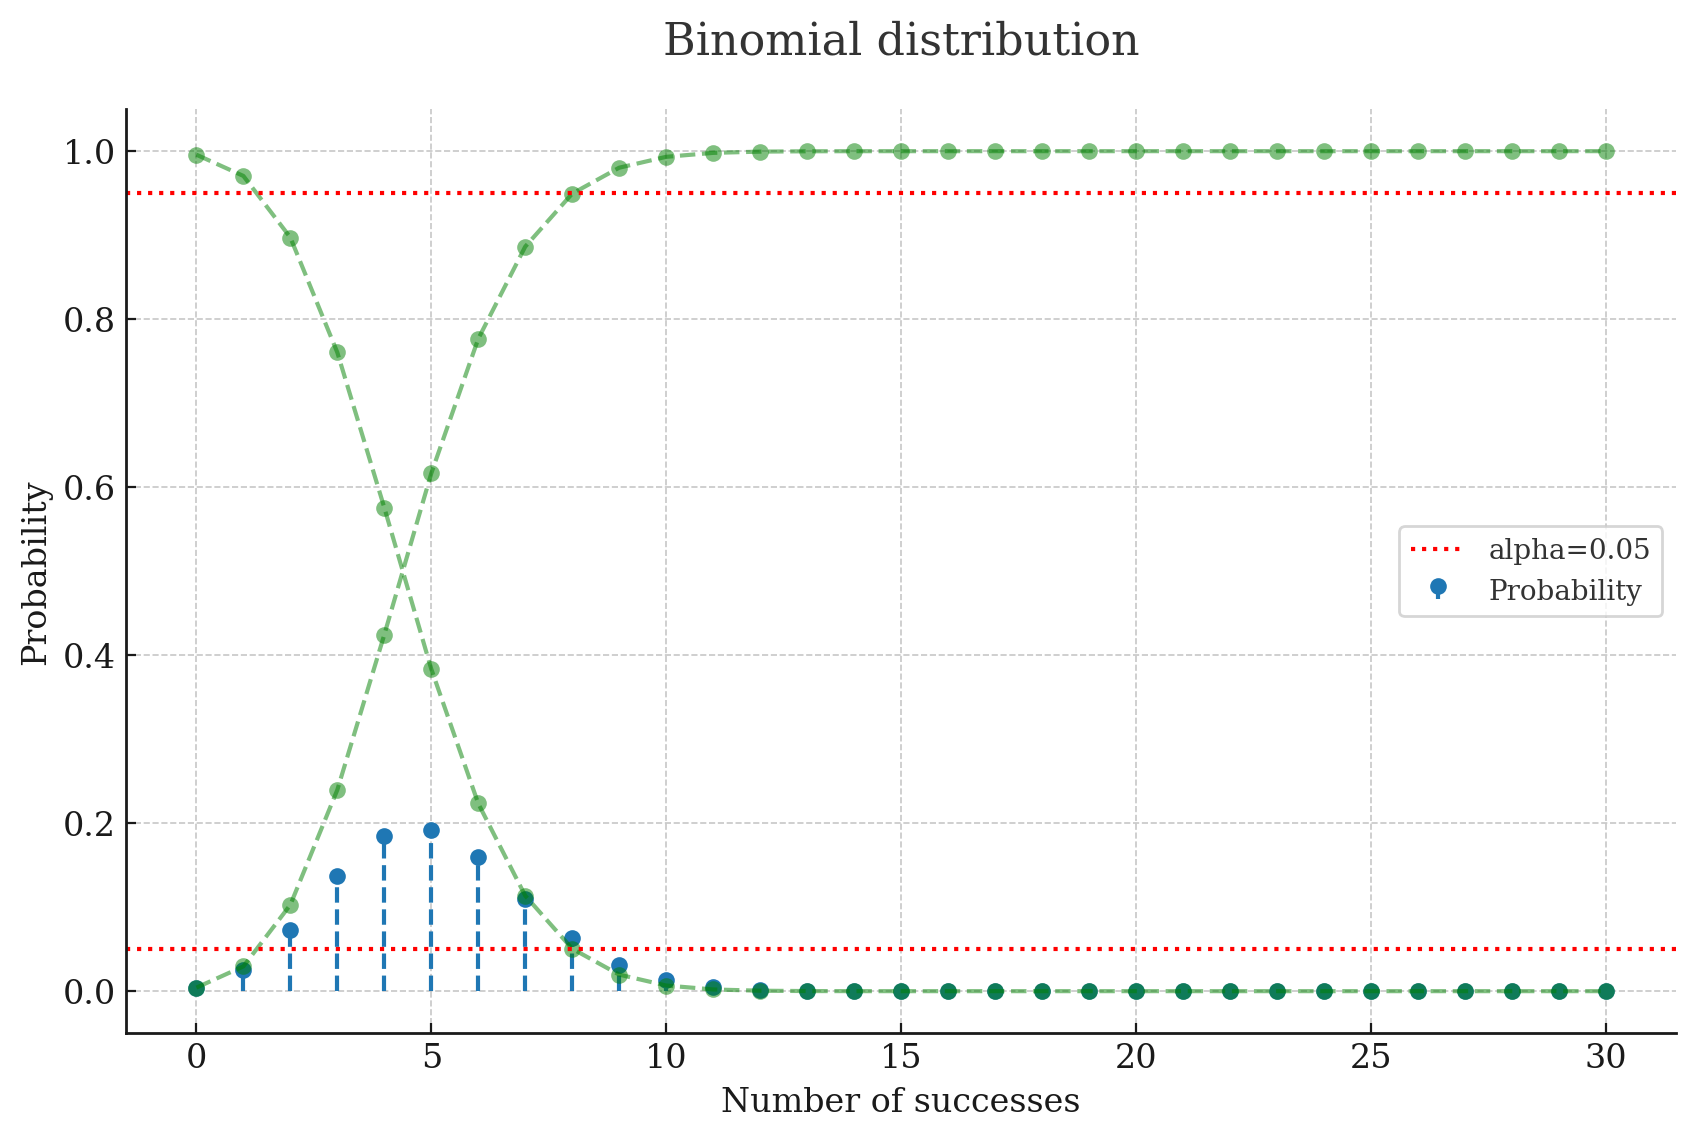

In [7]:
from scipy.stats import binom

n = 30
p = 1/6
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.stem(x, y, 'o--', basefmt=' ', label='Probability')
plt.plot(x, y.cumsum(), 'o--', color='green', alpha=0.5)
plt.plot(x, 1-(y.cumsum()), 'o--', color='green', alpha=0.5)
# plot horizontal line at y=0.05
plt.axhline(y=0.05, color='r', linestyle='dotted', label='alpha=0.05')
plt.axhline(y=1-0.05, color='r', linestyle='dotted')
# plt.axvline(x=5, color='r', linestyle='--')
# plt.axvline(x=5-2.04, color='orange', linestyle='--')
# plt.axvline(x=5+2.04, color='orange', linestyle='--')

plt.title('Binomial distribution')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [ ]:
# df = pd.DataFrame({'x': x, 'y': y})
# df['y_cumsum'] = df['y'].cumsum()
# df['1-y_cumsum'] = 1-df['y_cumsum']

In [ ]:
# from scipy.stats import binom

# # Given parameters
# n = 30  # number of attempts
# observed_successes = 3  # observed successes
# p_null = 1/6  # probability under H0
# type1_error = 0.1  # significance level (alpha)

# # Two-tailed test: calculate rejection region
# alpha_half = type1_error / 2  # split alpha for two tails

# # Lower and upper critical values (cumulative probabilities)
# lower_critical = binom.ppf(alpha_half, n, p_null)
# upper_critical = binom.ppf(1 - alpha_half, n, p_null) - 1  # -1 for inclusive range

# # Calculate the two-tailed p-value
# p_value_lower = binom.cdf(observed_successes, n, p_null)  # P(X <= observed_successes)
# p_value_upper = 1 - binom.cdf(6, n, p_null)  # P(X >= 7)
# p_value = p_value_lower + p_value_upper

# # Determine if observed data falls in rejection region
# reject_null = p_value < type1_error

# # Output results
# print("Lower critical value:", lower_critical)
# print("Upper critical value:", upper_critical)
# print("P(X <= 3):", p_value_lower)
# print("P(X >= 7):", p_value_upper)
# print("p-value:", p_value)
# print("Reject H0:", reject_null)

# if reject_null:
#     print("The player can reject the null hypothesis.")
# else:
#     print("The player cannot reject the null hypothesis.")


Lower critical value: 2.0
Upper critical value: 8.0
P(X <= 3): 0.23961952685801308
P(X >= 7): 0.22346287610024063
p-value: 0.4630824029582537
Reject H0: False
The player cannot reject the null hypothesis.


### 4. Rejection Region for 200 Games (\(\alpha = 0.1\)):
For \(n = 200\) and \(H_0: p = \frac{1}{6}\):
- Mean: \(E[X] = np = 200 \times \frac{1}{6} \approx 33.33\),
- Standard deviation: \(\text{SD}[X] = \sqrt{np(1-p)} \approx \sqrt{200 \times \frac{1}{6} \times \frac{5}{6}} \approx 5.27\).

The rejection region is determined by finding the critical values of \(X\) such that the total probability outside these values equals \(\alpha = 0.1\).

Using a normal approximation \(X \sim \mathcal{N}(33.33, 5.27^2)\), compute the critical values:
\[
z_{\alpha/2} = \pm 1.645 \quad (\text{for a two-tailed test}).
\]
Critical values:
\[
\text{Lower bound: } 33.33 - 1.645 \times 5.27 \approx 24.65,
\quad \text{Upper bound: } 33.33 + 1.645 \times 5.27 \approx 42.01.
\]

Rejection region (rounded):
\[
X \leq 24 \quad \text{or} \quad X \geq 43.
\]

---

### 5. Rejection Region Using Normal Approximation:
The rejection region derived in step 4 already uses a normal approximation. The critical values remain:
\[
X \leq 24 \quad \text{or} \quad X \geq 43.
\]

---

### 6. Minimum Probability for \(P(\text{Caught}) < 0.05\) (\(\alpha = 0.01\), \(n = 200\)):
Hamtaro wants the power of the player's test to be below \(0.05\) at \(\alpha = 0.01\).

The test power is:
\[
\text{Power} = P(\text{Reject } H_0 | p = p_{\text{bias}}).
\]
Hamtaro adjusts \(p_{\text{bias}}\) so that:
\[
\text{Power} < 0.05.
\]

From step 4, the rejection region is approximately:
\[
X \leq 24 \quad \text{or} \quad X \geq 43.
\]

For a biased probability \(p_{\text{bias}}\), \(X \sim \text{Binomial}(n = 200, p_{\text{bias}})\), and the mean and standard deviation are:
\[
E[X] = 200p_{\text{bias}}, \quad \text{SD}[X] = \sqrt{200p_{\text{bias}}(1 - p_{\text{bias}})}.
\]

Using the lower bound (\(X \leq 24\)):
\[
z = \frac{24.5 - 200p_{\text{bias}}}{\sqrt{200p_{\text{bias}}(1-p_{\text{bias}})}}.
\]
Solve for \(p_{\text{bias}}\) such that \(P(Z \leq z) < 0.05\). Numerical approximation yields:
\[
p_{\text{bias}} \approx 0.141.
\]

---

### 7. Minimum Probability for \(P(\text{Caught}) < 0.01\):
Using similar calculations but solving for \(P(Z \leq z) < 0.01\), numerical approximation gives:
\[
p_{\text{bias}} \approx 0.13645.
\]

# Problem 6: Hamtaro and the new AC company



From the previous assignment, Hamtaro tried to control the temperature of the cloud storage room so that the failure rate of storage disks is as low as possible. Later, a new company came to him and offered a new AC system that, in theory, could provide a more stable room temperature. To strengthen their claim, the company sends the historical room temperature of the new AC, of which the target temperature is set 15, to Hamtaro.

Given that Hamtaro's existing AC provides the room temperature of $t \sim \mathcal{N}(15, 0.5^2)$:

**TODO:6**
1. Formulate the null and alternative hypotheses for determining whether the new AC is better than the existing one or not. List your assumptions that are required to make this experiment possible.
2. Can you decide which AC system is better? Justify your answer.


In [ ]:
import numpy as np
temp_log = np.array([14.66017243, 14.82134507, 14.75354867, 15.02847413, 15.96338554,
       15.46598137, 15.35605532, 14.91048177, 15.13237189, 14.38789873,
       15.76833691, 14.85383663, 15.28335022, 15.06718901, 15.44364169,
       14.29511914, 15.13458572, 14.57428013, 15.14885716, 14.08580661,
       15.6006654 , 14.98109974, 14.95059512, 14.91460432, 14.68809902,
       15.4988617 , 14.99646465, 15.00654947, 14.65024467, 15.20684546,
       15.540787  , 15.39207656, 14.53129171, 14.27527689, 14.37856735,
       15.4685476 , 14.94268835, 15.28311368, 14.8878152 , 15.52350034,
       14.35791689, 15.11741279, 15.41721681, 15.56690632, 15.30108101,
       14.7138976 , 15.39536719, 15.02994055, 14.74887633, 14.81419334,
       15.36735467, 14.89706838, 14.89134826, 15.19781408, 15.3273354 ,
       15.16729623, 14.82748547, 15.59488402, 15.49763473, 15.12876929,
       14.11446324, 14.61298282, 14.57006854, 15.13227246, 14.68369474,
       14.96443757, 15.73872741, 15.48498884, 15.35770021, 15.13471147,
       14.94871779, 13.91322937, 14.84786617, 14.42086587, 15.26216287,
       14.33225067, 14.94179209, 14.57095395, 15.1261513 , 14.93201265,
       14.82252959, 15.19061294, 15.33257912, 14.72448901, 15.54406202,
       14.72704346, 14.9902773 , 14.71477903, 14.90866689, 14.28862563,
       15.04302902, 15.06973955, 14.51951387, 14.61413562, 14.58725869,
       14.41407727, 15.05585075, 14.69229146, 14.30425173, 14.76913898,
       14.27819269, 14.93917912, 14.22675051, 15.20964   , 14.96122782,
       14.05371218, 15.10273752, 15.50886439, 15.43965366, 14.98863063,
       15.34326459, 15.23694786, 13.90170147, 15.29660252, 15.26635161,
       15.34710713, 14.34928594, 15.61509746, 15.80476574, 15.36769161,
       14.52027993, 14.80624255, 14.58269606, 15.58830065, 14.25665696,
       14.86914893, 15.40500584, 15.28855103, 15.43907472, 15.18196326,
       15.47088551, 15.06327054, 15.01022434, 14.43508736, 15.3791887 ,
       14.86202479, 15.1697766 , 14.6434633 , 15.7263277 , 14.31813452,
       15.30657752, 14.91471004, 15.1456617 , 14.93856484, 15.14098396,
       14.76996958, 15.3890821 , 15.53549397, 15.28528007, 15.61416247,
       14.4514347 , 14.75105769, 14.22367585, 14.93898327, 14.61033024,
       14.96348807, 15.24771829, 14.84653005, 15.36780845, 14.96846837,
       14.66094081, 14.75905691, 14.96864336, 15.55687252, 14.62138304,
       16.02201637, 14.95786084, 14.98549356, 15.18029872, 14.82305383,
       15.093562  , 15.98065684, 15.27950419, 15.42169411, 15.66950953,
       14.90725077, 13.69523862, 15.7470953 , 14.93824139, 15.65590845,
       14.69911713, 14.63306529, 15.09566097, 15.00531748, 15.0664824 ,
       15.00496274, 15.1577527 , 15.26365236, 14.98708579, 14.43256043,
       15.5816707 , 14.69227952, 15.22774367, 15.01510129, 15.03105086,
       15.07222669, 15.22579141, 15.34835664, 15.14017702, 15.12604511])

# Problem 7: Hamtaro Empire Part 3

After Hamtaro has successfully established his factories (in Problem 4.2 HW 3),  he further boosts the factory productivity by replacing the old machines with a new type-II variant. However, there is a concern from the local factory managers that Hamtaro might get bamboozled, since they do not observe an increase in productivity compared to the previous one. Therefore, to ease their concern, he decided to conduct a z-testing.

Given that the number of goods produced each day by the old machines was $x \sim \mathcal{N}(5000, 20^2)$ :

1. Formulate the null and alternative hypothesis for determining whether the new machine is better than the previous one at a significant level = 0.05.
2. From the testing, can Hamtaro conclude that factory productivity increased as a whole?
3. Can Hamtaro say the same for each individual factory?
4. Repeat 1-3 again but with a t-test. Is there any difference from the z-test? What, and why does it happen?

In [17]:
from scipy.stats import norm
import numpy as np

# 30 days of product quantity in 4 factories

fac_0 = np.array([4993.89323126, 5021.67118211, 5023.54710937, 4999.11746331,
       5001.53450095, 4986.27990953, 4987.12362188, 5004.91535087,
       4999.97591193, 5038.09176163, 4993.94184053, 5026.5264468 ,
       5040.62862593, 4979.91124088, 5008.59143715, 5016.45331659,
       5013.63203948, 5010.84253735, 5014.99772195, 5002.39462129,
       5047.80507624, 5007.23005532, 5019.87205007, 5005.76363012,
       4997.09106036, 4982.80291132, 5037.18158407, 4996.54197735,
       5007.57964251, 4971.18880247])

fac_1 = np.array([5036.80041897, 4989.33779117, 4971.68709581, 5041.92493487,
       5041.64823146, 5026.33602398, 5009.58334612, 4989.05382998,
       5031.17423169, 4992.20198911, 4970.63425555, 5007.17615704,
       4993.84416738, 5028.59671588, 5009.91388156, 5049.64187466,
       5015.12711371, 5032.2900513 , 5013.66869347, 4988.21257317,
       5020.44276181, 4985.62886808, 5022.46800468, 5042.35501669,
       5001.6153908 , 5012.14209858, 5006.14666402, 4999.93219541,
       5002.77927647, 5002.20750425])

fac_2 = np.array([5029.95293241, 5019.47959949, 4976.8427836 , 4985.22792264,
       4994.97618684, 5026.75059569, 5015.71350753, 5008.46632673,
       5037.96915682, 4990.38948551, 4988.7082206 , 5032.42440206,
       5036.41040953, 5003.75236158, 5002.62361815, 4998.8932057 ,
       5000.51153033, 5002.19196574, 5023.74534474, 5032.03601587,
       5000.10614764, 4989.74566985, 4985.97436664, 4973.63380449,
       5028.58100504, 4997.8426781 , 5011.4202198 , 5018.71432385,
       4969.03296199, 5009.23456565])
fac_3 = np.array([4962.36508403, 5015.91734917, 5030.86885403, 5012.74787091,
       5036.94455211, 4995.2103757 , 5029.84241184, 5015.68062582,
       4996.43546786, 4999.57614716, 5006.88735305, 5035.10432486,
       5017.33437936, 5006.70625696, 5007.97827037, 4981.80482708,
       5020.78603239, 4993.12742287, 4996.10718141, 4988.00315629,
       5003.00004152, 4949.54117305, 5008.6250048 , 5004.09075453,
       5026.56246304, 5011.02296759, 5010.67413795, 4990.58062539,
       5009.64435703, 5001.9413428 ])


**Solution**:

1. Formulate the null and alternative hypothesis for determining whether the new machine is better than the previous one at a significant level = 0.05.

Null Hypothesis ($H_0$):
 
The new machine is not better than the previous one, the mean number of goods produced is the same.

Given that the number of goods produced each day by the old machines was $x \sim \mathcal{N}(5000, 20^2)$ :
$$
H_0: \mu_{\text{new}} \leq 5000
$$

Alternative Hypothesis ($H_a$):

The new machine is better than the previous one, the mean number of goods produced is higher.

$$
H_a: \mu_{\text{new}} > 5000
$$

2. From the testing, can Hamtaro conclude that factory productivity increased as a whole?

In [14]:
from scipy.stats import norm
import numpy as np

# Data for all factories combined
data_all_factories = np.concatenate([
    np.array([4993.89323126, 5021.67118211, 5023.54710937, 4999.11746331,
              5001.53450095, 4986.27990953, 4987.12362188, 5004.91535087,
              4999.97591193, 5038.09176163, 4993.94184053, 5026.5264468,
              5040.62862593, 4979.91124088, 5008.59143715, 5016.45331659,
              5013.63203948, 5010.84253735, 5014.99772195, 5002.39462129,
              5047.80507624, 5007.23005532, 5019.87205007, 5005.76363012,
              4997.09106036, 4982.80291132, 5037.18158407, 4996.54197735,
              5007.57964251, 4971.18880247]),
    np.array([5036.80041897, 4989.33779117, 4971.68709581, 5041.92493487,
              5041.64823146, 5026.33602398, 5009.58334612, 4989.05382998,
              5031.17423169, 4992.20198911, 4970.63425555, 5007.17615704,
              4993.84416738, 5028.59671588, 5009.91388156, 5049.64187466,
              5015.12711371, 5032.2900513, 5013.66869347, 4988.21257317,
              5020.44276181, 4985.62886808, 5022.46800468, 5042.35501669,
              5001.6153908, 5012.14209858, 5006.14666402, 4999.93219541,
              5002.77927647, 5002.20750425]),
    np.array([5029.95293241, 5019.47959949, 4976.8427836, 4985.22792264,
              4994.97618684, 5026.75059569, 5015.71350753, 5008.46632673,
              5037.96915682, 4990.38948551, 4988.7082206, 5032.42440206,
              5036.41040953, 5003.75236158, 5002.62361815, 4998.8932057,
              5000.51153033, 5002.19196574, 5023.74534474, 5032.03601587,
              5000.10614764, 4989.74566985, 4985.97436664, 4973.63380449,
              5028.58100504, 4997.8426781, 5011.4202198, 5018.71432385,
              4969.03296199, 5009.23456565]),
    np.array([4962.36508403, 5015.91734917, 5030.86885403, 5012.74787091,
              5036.94455211, 4995.2103757, 5029.84241184, 5015.68062582,
              4996.43546786, 4999.57614716, 5006.88735305, 5035.10432486,
              5017.33437936, 5006.70625696, 5007.97827037, 4981.80482708,
              5020.78603239, 4993.12742287, 4996.10718141, 4988.00315629,
              5003.00004152, 4949.54117305, 5008.6250048, 5004.09075453,
              5026.56246304, 5011.02296759, 5010.67413795, 4990.58062539,
              5009.64435703, 5001.9413428])
])

# Known parameters of the old machines
mu_old = 5000
sigma_old = 20

# Sample mean and size
sample_mean = np.mean(data_all_factories)
sample_size = len(data_all_factories)

# Z-test
z_stat = (sample_mean - mu_old) / (sigma_old / np.sqrt(sample_size))
p_value = 1 - norm.cdf(z_stat)  # One-tailed test

# Output results
{
    "Sample Mean": sample_mean,
    "Z-Statistic": z_stat,
    "P-Value": p_value,
    "Reject Null Hypothesis (H0)": p_value < 0.05
}


{'Sample Mean': 5007.734666198917,
 'Z-Statistic': 4.2364511519194625,
 'P-Value': 1.1354014685771574e-05,
 'Reject Null Hypothesis (H0)': True}

reject $H_0$, $\therefore$ conclude that the new machines significantly **increased** productivity overall.

3. Can Hamtaro say the same for each individual factory?

In [18]:
# Function to perform z-test for individual factories
def z_test_factory(data, mu_old, sigma_old, alpha=0.05):
    sample_mean = np.mean(data)
    sample_size = len(data)
    z_stat = (sample_mean - mu_old) / (sigma_old / np.sqrt(sample_size))
    p_value = 1 - norm.cdf(z_stat)  # One-tailed test
    reject_null = p_value < alpha
    return {
        "Sample Mean": sample_mean,
        "Z-Statistic": z_stat,
        "P-Value": p_value,
        "Reject Null Hypothesis (H0)": reject_null
    }

# Data for individual factories
factories = {
    "Factory 0": fac_0,
    "Factory 1": fac_1,
    "Factory 2": fac_2,
    "Factory 3": fac_3
}

# Run z-test for each factory
results = {factory: z_test_factory(data, mu_old=5000, sigma_old=20) for factory, data in factories.items()}
results


{'Factory 0': {'Sample Mean': 5007.904222020666,
  'Z-Statistic': 2.1646603501238224,
  'P-Value': 0.015206852813733351,
  'Reject Null Hypothesis (H0)': True},
 'Factory 1': {'Sample Mean': 5011.152371922332,
  'Z-Statistic': 3.05420283577434,
  'P-Value': 0.0011282972610209274,
  'Reject Null Hypothesis (H0)': True},
 'Factory 2': {'Sample Mean': 5006.378377153666,
  'Z-Statistic': 1.7467905236693428,
  'P-Value': 0.040336840487064096,
  'Reject Null Hypothesis (H0)': True},
 'Factory 3': {'Sample Mean': 5005.503693698999,
  'Z-Statistic': 1.5072485942704237,
  'P-Value': 0.0658734743204481,
  'Reject Null Hypothesis (H0)': False}}

$\therefore$ Hamtaro **cannot** say the same for each individual factory,\
because the results are not same for each individual factories.\
i.e. factory 3 fail to reject $H_0$ (not have enough evidence to conclude that improved)\
but factory 0, 1, 2 reject $H_0$ (improved).

4. Repeat 1-3 again but with a t-test. Is there any difference from the z-test? What, and why does it happen?

In [20]:
from scipy.stats import ttest_1samp

# Function to perform t-test for individual factories
def t_test_factory(data, mu_old, alpha=0.05):
    t_stat, p_value = ttest_1samp(data, mu_old)
    p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)  # One-tailed adjustment
    reject_null = p_value_one_tailed < alpha
    return {
        "Sample Mean": np.mean(data),
        "T-Statistic": t_stat,
        "P-Value (One-Tailed)": p_value_one_tailed,
        "Reject Null Hypothesis (H0)": reject_null
    }

# Perform t-test for each factory
t_test_results = {factory: t_test_factory(data, mu_old=5000) for factory, data in factories.items()}

# Perform t-test for all factories combined
t_stat_all, p_value_all = ttest_1samp(data_all_factories, mu_old)
p_value_one_tailed_all = p_value_all / 2 if t_stat_all > 0 else 1 - (p_value_all / 2)
t_test_combined = {
    "Sample Mean (All Factories)": np.mean(data_all_factories),
    "T-Statistic (All Factories)": t_stat_all,
    "P-Value (One-Tailed, All Factories)": p_value_one_tailed_all,
    "Reject Null Hypothesis (H0) (All Factories)": p_value_one_tailed_all < 0.05
}

t_test_results, t_test_combined


({'Factory 0': {'Sample Mean': 5007.904222020666,
   'T-Statistic': 2.3262427416035476,
   'P-Value (One-Tailed)': 0.01359979760628693,
   'Reject Null Hypothesis (H0)': True},
  'Factory 1': {'Sample Mean': 5011.152371922332,
   'T-Statistic': 2.8826842135207373,
   'P-Value (One-Tailed)': 0.0036764678223551303,
   'Reject Null Hypothesis (H0)': True},
  'Factory 2': {'Sample Mean': 5006.378377153666,
   'T-Statistic': 1.8045362143046846,
   'P-Value (One-Tailed)': 0.04077133002863415,
   'Reject Null Hypothesis (H0)': True},
  'Factory 3': {'Sample Mean': 5005.503693698999,
   'T-Statistic': 1.558858190428435,
   'P-Value (One-Tailed)': 0.06493877130251388,
   'Reject Null Hypothesis (H0)': False}},
 {'Sample Mean (All Factories)': 5007.734666198917,
  'T-Statistic (All Factories)': 4.340951533630494,
  'P-Value (One-Tailed, All Factories)': 1.49802125120743e-05,
  'Reject Null Hypothesis (H0) (All Factories)': True})

$\therefore$
- As a whole, the new machines improve productivity significantly.
- Individually, Factories 0, 1, and 2 show significant improvement, while Factory 3 does not.

Comparing Results
- Similar
  - For the combined dataset (all factories), both the t-test and z-test give **similar results** due to the large sample size.
  - For individual factories, the conclusions about rejecting $H_0$ (improvement) are largely consistent.
- Differences
  - The t-test uses the sample standard deviation (not the known population standard deviation like the z-test). This can cause slight differences in p-values, especially for smaller sample sizes (like individual factories).


Why Does it Happen?, Because **Sample Size**.
- Small Sample Sizes: The t-test adjusts for variability in estimating the standard deviation, particularly for small sample sizes.
- Large Sample Sizes: The sample standard deviation is a reliable estimate of the population standard deviation. This makes the t-test and z-test results similar.
